Dataset shape: (303, 7)


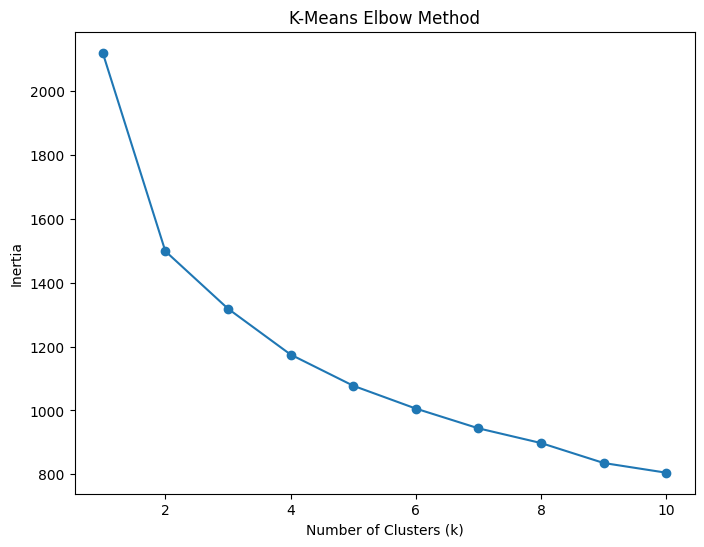


K-Means Results:
ARI (Adjusted Rand Index): 0.455860651499769
Silhouette Score: 0.2898160696666745


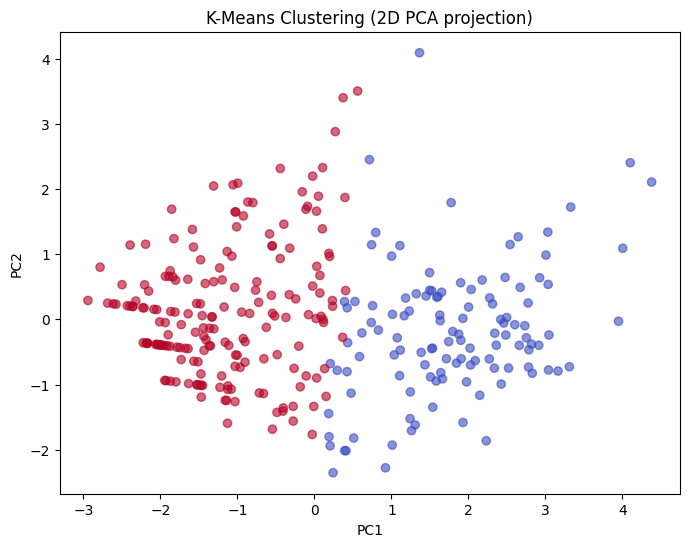

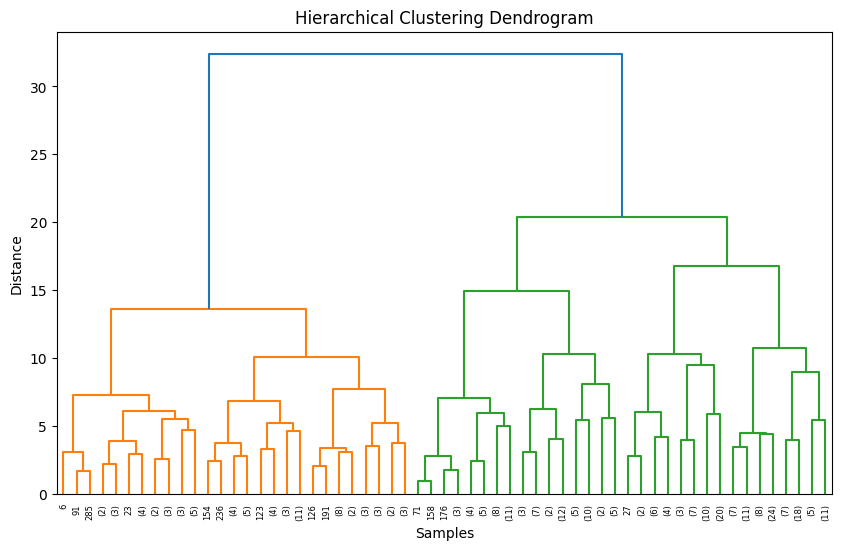


Hierarchical Clustering Results:
ARI (Adjusted Rand Index): 0.28647269720254115
Silhouette Score: 0.2686359215592109


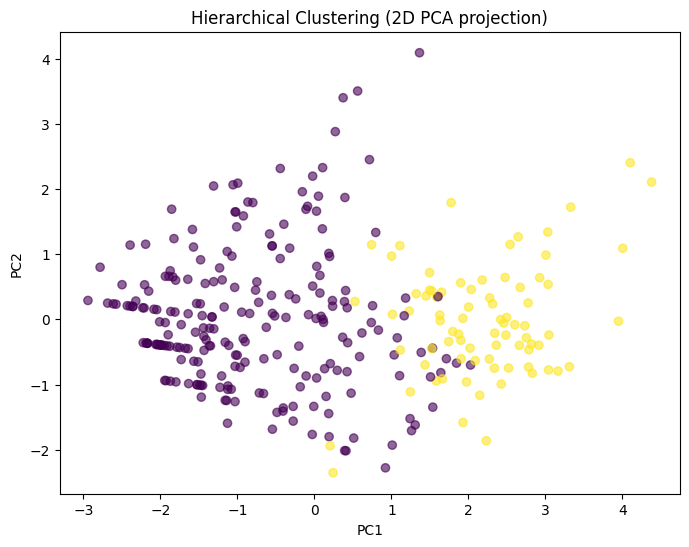


✅ Clustering results saved as 'clustering_results.csv'


In [1]:
# 1. Imports
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# =========================
# 2. Load Data
# =========================
data = pd.read_csv("heart_disease_selected.csv")
target_col = "num"
X = data.drop(columns=[target_col])
y = data[target_col].apply(lambda x: 1 if x > 0 else 0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dataset shape:", X.shape)

# =========================
# 3. K-Means Clustering
# =========================
# Elbow method to choose k
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker="o")
plt.title("K-Means Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Choose k=2 (since target is binary: disease vs no disease)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("\nK-Means Results:")
print("ARI (Adjusted Rand Index):", adjusted_rand_score(y, kmeans_labels))
print("Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))

# =========================
# K-Means Visualization (2D PCA)
# =========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap="coolwarm", alpha=0.6)
plt.title("K-Means Clustering (2D PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# =========================
# 4. Hierarchical Clustering
# =========================
# Dendrogram
linked = linkage(X_scaled, method="ward")
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Agglomerative clustering (2 clusters)
hc = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward")
hc_labels = hc.fit_predict(X_scaled)

print("\nHierarchical Clustering Results:")
print("ARI (Adjusted Rand Index):", adjusted_rand_score(y, hc_labels))
print("Silhouette Score:", silhouette_score(X_scaled, hc_labels))

# =========================
# Hierarchical Clustering Visualization (2D PCA)
# =========================
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap="viridis", alpha=0.6)
plt.title("Hierarchical Clustering (2D PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# =========================
# 5. Save Results
# =========================
cluster_results = pd.DataFrame({
    "True_Label": y,
    "KMeans_Label": kmeans_labels,
    "Hierarchical_Label": hc_labels
})
cluster_results.to_csv("clustering_results.csv", index=False)
print("\n✅ Clustering results saved as 'clustering_results.csv'")
